# Check the width growing in pos 16 (decrease a lot data in ML_15), 47(increase a lot data in ML_15) of plate 521.
it increases the most in ground truth.

In [1]:
# %matplotlib widget
%load_ext autoreload
%autoreload 2
import os,random,json,imageio,logging,cv2
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import profile_line
from multiprocessing import Process,Manager
import sys
sys.path.append("/Users/kai/Downloads/graduation/final_git/MasterThesis/src/")
from config import *
from video import *
sys.path.append(AMFTracker_path)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import *
from amftrack.pipeline.functions.image_processing.experiment_util import *
from amftrack.util.sys import *
from amftrack.util.plot import *
from amftrack.util.geometry import *
from amftrack.util.image_analysis import *
from amftrack.pipeline.functions.image_processing.extract_width_fun import *

/Users/kai/Downloads/graduation/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## unzip for different time point

In [2]:
path = os.path.join(storage_path,"video","521_20230104")
folder = os.listdir(path)
folder.sort()

In [3]:
folder_name = "Analysis"
file_name = "Analysis.zip"
for i in folder[7:]:
    folder_path = os.path.join(path,i)
    make_folder_path = os.path.join(folder_path, folder_name)
    move_file_path = os.path.join(folder_path, file_name)
    unzip_file_path = os.path.join(folder_path,folder_name,file_name)
    os.mkdir(make_folder_path)
    shutil.move(move_file_path, make_folder_path)
    with zipfile.ZipFile(unzip_file_path, 'r') as zip_ref:
        zip_ref.extractall(make_folder_path)
    os.remove(unzip_file_path)

FileExistsError: [Errno 17] File exists: '/home/ipausers/lin/Desktop/data/video/521_20230104/20230109_1409_Plate02/Analysis'

In [ ]:
extract_file(path,"Analysis","Analysis.zip")
extract_file(path,"Img","Img.zip")

## Select the region and create video

In [2]:
directory_groundtruths = os.path.join(storage_path,"video","521_20230104")
directory = directory_groundtruths+"/"
update_plate_info(directory)
save_img_path = directory+"video_img/"
directory,save_img_path

analysed:   0%|          | 0/62 [00:00<?, ?it/s]

('/home/ipausers/lin/Desktop/data/video/521_20230104/',
 '/home/ipausers/lin/Desktop/data/video/521_20230104/video_img/')

In [3]:
folder_df = get_current_folders(directory)
file_names = folder_df.folder.tolist()
file_names.sort()

In [4]:
select = folder_df[(folder_df["Plate"] == "521") & (folder_df["folder"] == file_names[0])]
select

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,unique_id,datetime
0,/home/ipausers/lin/Desktop/data/video/521_2023...,521,2,'Carrot','C2','001P100N100C','Y','-',20230104,25,...,True,True,True,True,True,True,"09.01.2023, 01:49:",20230109_0149_Plate02,521_20230104,2023-01-09 01:49:00


In [11]:
exp = Experiment(directory)
exp.load(select, suffix="")
exp.load_tile_information(0)

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 01:49:00


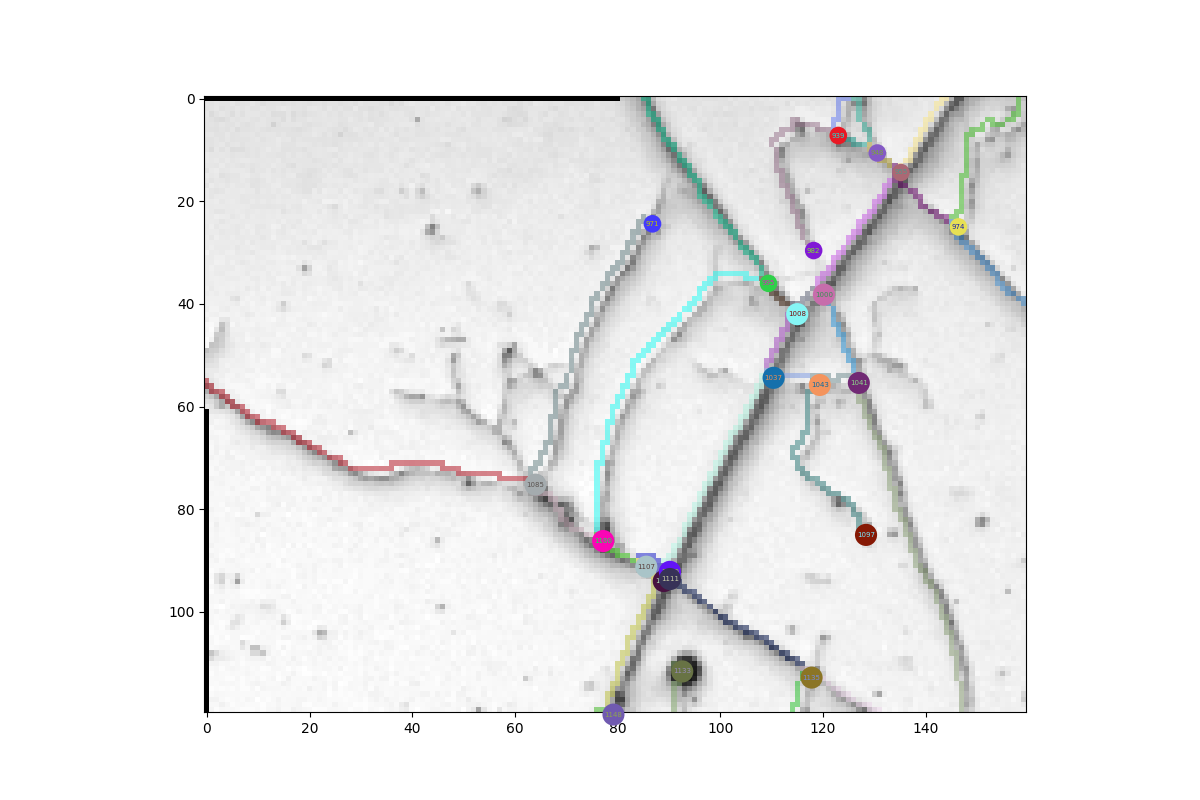

In [13]:
%matplotlib widget
plot_full(exp,t=0,downsizing=5,region= [[16600, 19600], [17200,20400]],
                              edges=get_all_edges(exp, 0),
                              nodes=get_all_nodes(exp, 0))

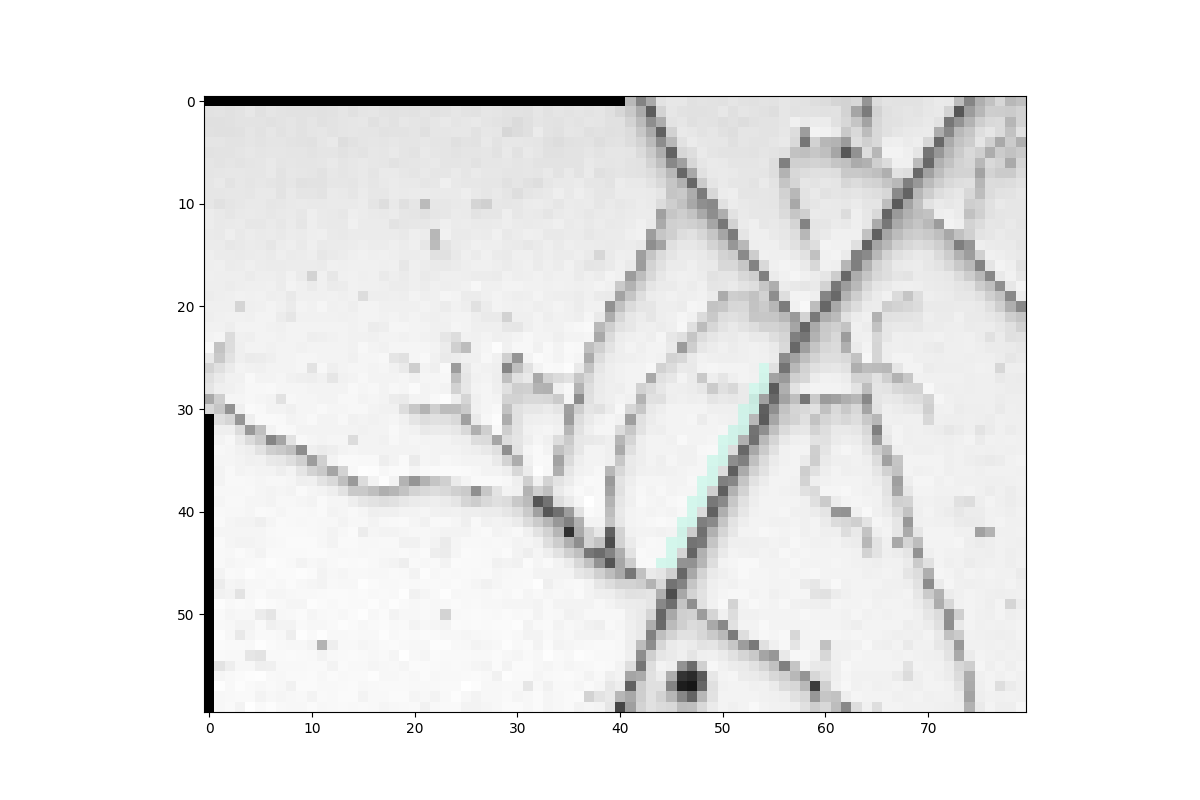

In [14]:
plot_full(exp,t=0,downsizing=10,region= [[16600, 19600], [17200,20400]],
                              edges=[get_edge_from_node_labels(exp, 0, node1, node2) for node1, node2 in [(1037, 1109)]])

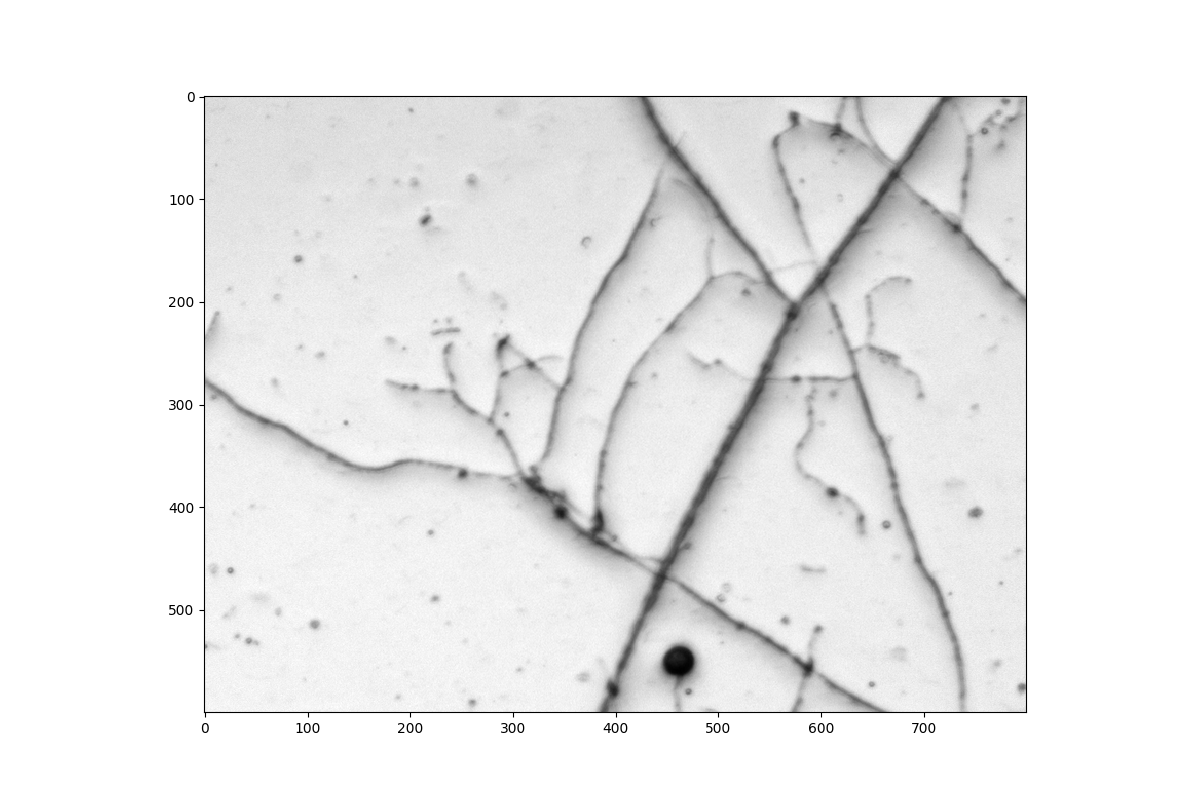

In [62]:
%matplotlib widget
plot_full(exp,t=0,downsizing=1,region= [[16600, 19600], [17200,20400]])

In [26]:
plate_number = "521"
for file_name in file_names[53:]:
    select = folder_df[(folder_df["Plate"] == plate_number) & (folder_df["folder"] == file_name)]
    image_for_video(directory, file_name,select,"521",[[16600, 19600], [17200,20400]], save_img_path,downsizing=1)
    plt.clf()

2023-01-13 13:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


FileNotFoundError: [Errno 2] No such file or directory: '/home/ipausers/lin/Desktop/data/video/521_20230104/20230113_1349_Plate02/Analysis/nx_graph_pruned.p'

In [75]:
img_name = os.listdir(save_img_path)
img_name.sort()
# img_path = [os.path.join(save_img_path,path) for path in img_name]
# img_path = img_path[1:]
# len(img_path

In [ ]:
%matplotlib widget
img3 = cv2.imread(os.path.join(save_img_path,img_files[0]))
pos = img3.shape[0]//10, img3.shape[1]//10
cv2.putText(img=img3, text='Hello', org=pos, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=3, color=(0, 255, 0),thickness=3)
imageio.imwrite(os.path.join(save_img_path,img_files[0]), img3)

In [69]:
import cv2
from datetime import datetime
import imageio
def img_to_video(img_files:list, save_img_path:str, save_file_name:str):
    img_path = [os.path.join(save_img_path,file) for file in img_files]
    date_list = ["".join(os.path.splitext(path)[0].split("/")[-1].split("_")[:2]) for path in img_path]
    datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
    diff_list = [(date - datetime_list[0]) for date in datetime_list] 
    hr_list = [str(hr.seconds//3600+hr.days*24) + "hour(s)" for hr in diff_list] 
    imgs = [cv2.imread(path) for path in img_path]
    for index,img in enumerate(imgs):
        pos = img.shape[0]//10, img.shape[1]//10
        cv2.putText(img=img, text=hr_list[index], org=pos, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=3, color=(0, 255, 0),thickness=3)
    imageio.mimsave(os.path.join(save_img_path,save_file_name),imgs)
    return imgs

In [77]:
img_name = img_name[1:]

In [78]:
img_to_video(img_name,save_img_path,"width_growing_pos16.mp4")

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

## extract the width for video

In [5]:
directory_groundtruths = os.path.join(storage_path,"video","521_20230104")
directory = directory_groundtruths+"/"
update_plate_info(directory)
save_img_path = directory+"video_img/"
directory,save_img_path

analysed:   0%|          | 0/62 [00:00<?, ?it/s]

('/home/ipausers/lin/Desktop/data/video/521_20230104/',
 '/home/ipausers/lin/Desktop/data/video/521_20230104/video_img/')

In [6]:
folder_df = get_current_folders(directory)
file_names = folder_df.folder.tolist()
file_names.sort()

In [10]:
from models.model import load_model
latest = load_model(model_path,"BO_without_crop_best_model")
f_profiles = lambda edge: extract_section_profiles_for_edge(exp, 0, edge, resolution=5, offset=4, step=3,target_length=120)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

In [11]:
collect = []
node_list = [(1037, 1109),(1080, 1156),(1131, 1205),(1247, 1321),(1232, 1315),(1324, 1397),(2097, 2221),(1715, 1824),(1501, 1602),(1367, 1463),(1454, 1551),(1522, 1628),(1557, 1659),(1611, 1717),(1745, 1861),(1814, 1918),(1823, 1928),(1846, 1965),(1950, 2057),(1935, 2049),(1965, 2074),(1924, 2055),(1857, 1977),(1882, 1997),(2021, 2131),(2015, 2134),(2236, 2360),(2068, 2193),(1960, 2094),(1819, 1950),(1831, 1960),(1978, 2107),(2014, 2145),(2037, 2180),(2127, 2253),(2162, 2301),(2205, 2346),(2219, 2351),(2205, 2333),(2193, 2322),(2328, 2457),(2297, 2447),(2362, 2507),(2419, 2541),(2395, 2529),(2385, 2514),(2460, 2602),(2500, 2632),(2565, 2695),(2482, 2615),(2572, 2709),(2382, 2508)]
exp = Experiment(directory)
def get_slices_from_node(index,return_dict):
    select = folder_df[(folder_df["Plate"] == "521") & (folder_df["folder"] == file_names[index])]
    exp.load(select, suffix="")
    exp.load_tile_information(0)
    node1, node2 = node_list[index]
    slices, coords1, coords2 = f_profiles(get_edge_from_node_labels(exp, 0, node1,node2))
    print(str(index)+" is processing")
    return_dict[index] = slices
    
manager = Manager()
return_dict = manager.dict()
for i in range(52):
    p = Process(target=get_slices_from_node, args=(i,return_dict))
    p.start()
    collect.append(p)
for process in collect:
    process.join()

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su

2023-01-09 03:49:002023-01-09 01:49:002023-01-09 05:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(





2023-01-09 07:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 09:49:00
2023-01-09 14:09:002023-01-09 11:49:00



/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 19:49:002023-01-09 17:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(




2023-01-09 21:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-09 23:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 01:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 03:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 05:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-10 07:49:002023-01-10 09:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(




2023-01-10 14:20:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-10 11:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-10 17:46:002023-01-10 15:46:00




/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 19:46:002023-01-10 21:46:00



/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 23:46:002023-01-11 01:46:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-11 03:46:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-11 05:46:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-11 07:46:002023-01-11 09:46:00



/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-11 11:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-11 13:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-11 18:06:002023-01-11 15:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-11 19:49:00
2023-01-11 21:49:00



/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su

2023-01-11 23:49:002023-01-12 01:49:002023-01-12 03:49:00




/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-12 05:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-12 07:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-12 09:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-12 11:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-12 13:49:00
2023-01-12 15:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-12 17:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-12 19:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-12 21:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-12 23:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-13 01:49:002023-01-13 03:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-13 05:49:00
2023-01-13 07:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-13 09:49:00
5 is processing1 is processing

0 is processing
9 is processing
28 is processing
2 is processing
4 is processing7 is processing

10 is processing
6 is processing
8 is processing
13 is processing
3 is processing
29 is processing
11 is processing
14 is processing
24 is processing
20 is processing
12 is processing
16 is processing
17 is processing
15 is processing
18 is processing
27 is processing
23 is processing
38 is processing
40 is processing
36 is processing
32 is processing
30 is processing
33 is processing
19 is processing22 is processing

21 is processing
26 is processing
25 is processing
31 is processing
34 is processing
42 is processing
39 is processing
37 is processing
45 is processing
41 is processing
46 is processing
35 is processing
47 is processing
49 is processing
48 is processing
44 is processing
43 is processing
51 is processing
50 is processing


In [13]:
manager = Manager()
width_dict = manager.dict()
collect = []
def get_width_from_slices(index,width_dict):
    print(index)
    predict_value = latest.predict(return_dict[index],verbose=0)
    print(predict_value)
    width_dict[index] = np.median(predict_value)
for i in range(52):
    p = Process(target=get_width_from_slices, args=(i,width_dict))
    p.start()
    collect.append(p)
for process in collect:
    process.join()

0
1
2
3
4
56

7
8910


1112

13
1415
16
18
17
19
20
2122


23
24
25
2628
27

2930

31
3332

34
35
36
3738

39
414042

43

44

454647

4849
50
51



KeyboardInterrupt: 

In [14]:
for i in range(52):
    get_width_from_slices(i,width_dict)

0
[[10.103516 ]
 [ 9.533051 ]
 [ 9.852182 ]
 [10.272369 ]
 [ 9.549337 ]
 [10.687408 ]
 [10.819315 ]
 [ 9.126111 ]
 [10.445888 ]
 [ 8.073008 ]
 [ 9.341505 ]
 [ 9.209166 ]
 [ 9.197096 ]
 [ 8.474369 ]
 [ 8.894049 ]
 [ 8.737898 ]
 [ 9.314703 ]
 [ 9.485056 ]
 [ 8.899881 ]
 [ 8.911483 ]
 [ 9.458924 ]
 [ 9.752231 ]
 [ 9.230476 ]
 [ 9.371872 ]
 [ 8.206581 ]
 [ 8.679472 ]
 [ 8.881459 ]
 [ 9.44823  ]
 [ 9.680662 ]
 [10.229683 ]
 [10.106858 ]
 [ 9.048099 ]
 [ 9.060361 ]
 [ 9.538792 ]
 [ 8.214876 ]
 [ 8.324148 ]
 [ 9.855701 ]
 [ 9.16089  ]
 [ 9.27088  ]
 [ 9.582681 ]
 [ 9.603482 ]
 [10.343491 ]
 [ 7.8499374]
 [ 7.713756 ]]
1
[[ 7.793182 ]
 [ 9.33451  ]
 [ 9.410362 ]
 [ 9.985539 ]
 [ 9.500517 ]
 [10.483652 ]
 [10.377428 ]
 [ 9.2576885]
 [ 9.130121 ]
 [ 8.58715  ]
 [ 9.204509 ]
 [ 9.680142 ]
 [ 9.498127 ]
 [ 8.434737 ]
 [ 8.631333 ]
 [ 8.923226 ]
 [ 9.371028 ]
 [ 8.92902  ]
 [ 8.831897 ]
 [ 9.393008 ]
 [ 9.503031 ]
 [ 9.498318 ]
 [ 9.076524 ]
 [ 9.22897  ]
 [ 8.944746 ]
 [ 9.623327 ]
 [ 8.666354 ]
 

In [15]:
width = []
for i in range(52):
    width.append(width_dict[i])

In [20]:
width

[9.328104,
 9.243329,
 9.246773,
 9.388824,
 9.739861,
 9.513829,
 9.570805,
 10.312435,
 10.055651,
 9.814355,
 9.799918,
 9.817856,
 9.731155,
 9.799763,
 9.651304,
 9.912888,
 9.922378,
 8.705971,
 8.537638,
 8.654546,
 8.591708,
 8.980228,
 8.799846,
 8.726027,
 8.712868,
 8.69093,
 8.845579,
 8.67079,
 9.38801,
 9.478924,
 9.376144,
 9.317013,
 9.352955,
 9.425109,
 9.685868,
 9.588438,
 9.409302,
 9.298767,
 9.167433,
 9.25692,
 9.631451,
 9.581018,
 9.619763,
 9.498259,
 9.461973,
 9.516825,
 9.63736,
 9.53961,
 9.345563,
 9.344063,
 9.297775,
 9.438229]

In [17]:
# date_list = ["".join(os.path.splitext(path)[0].split("/")[-1].split("_")[:2]) for path in img_path]
from datetime import datetime
date_list = ["".join(file.split("_")[:2]) for file in file_names[:52]]
datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
diff_list = [(date - datetime_list[0]) for date in datetime_list] 
hr_list = [str(hr.seconds//3600+hr.days*24) + "hour(s)" for hr in diff_list] 

In [18]:
save_img_path = os.path.join(storage_path,'video',"521_20230104",'video_img')
save_img_path

'/home/ipausers/lin/Desktop/data/video/521_20230104/video_img'

/tmp/ipykernel_175472/1102646175.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 4), dpi=80)


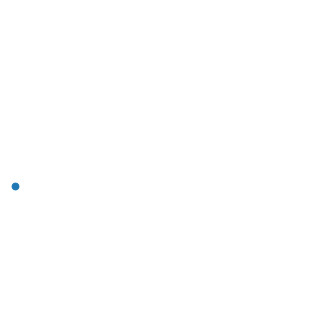

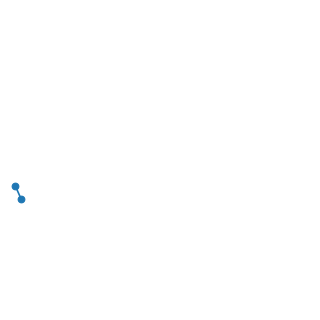

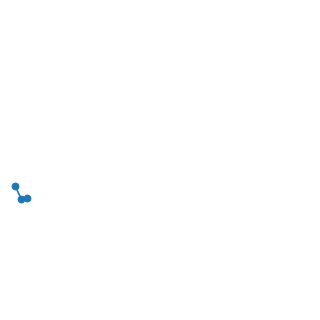

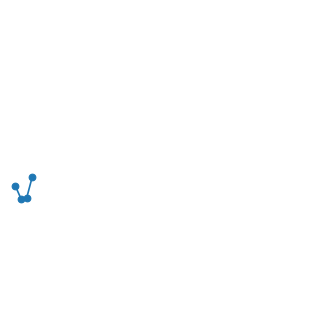

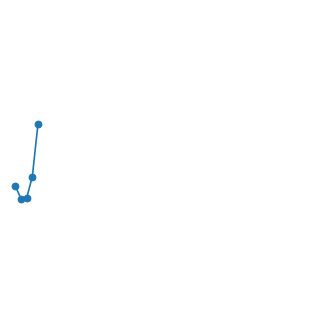

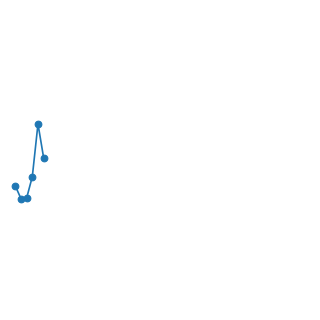

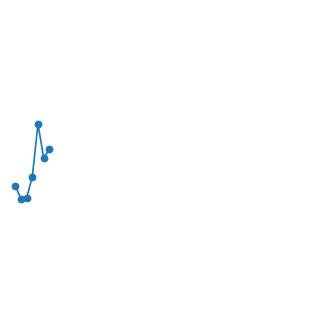

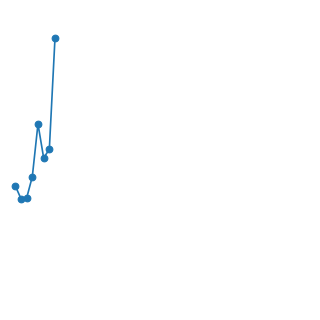

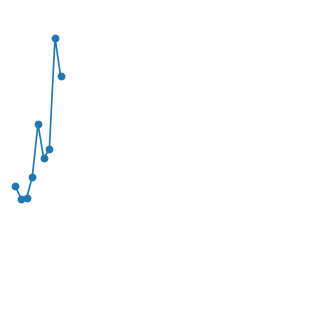

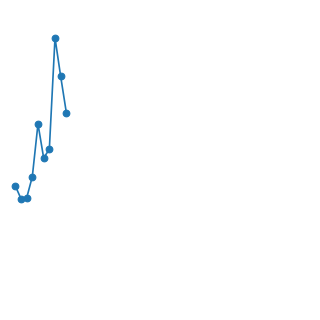

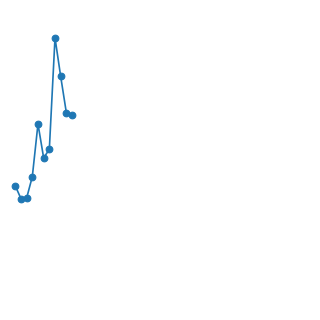

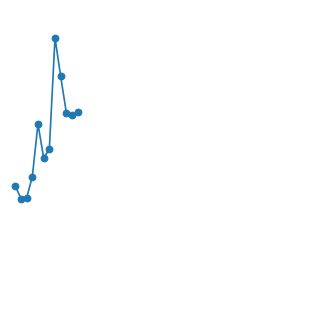

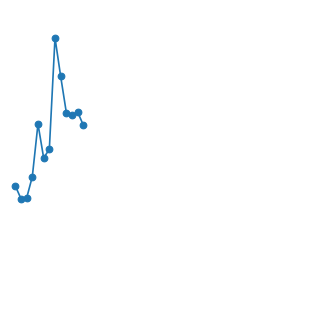

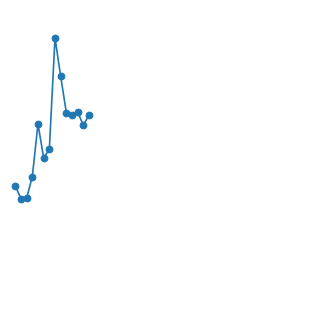

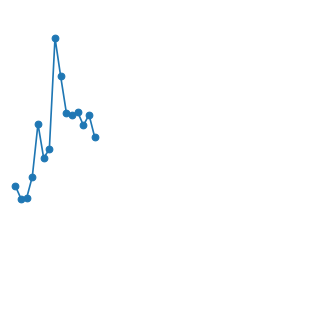

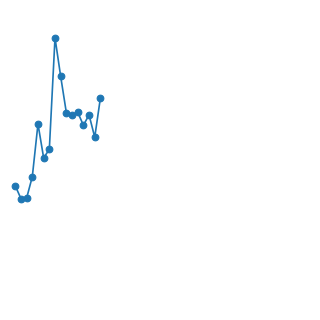

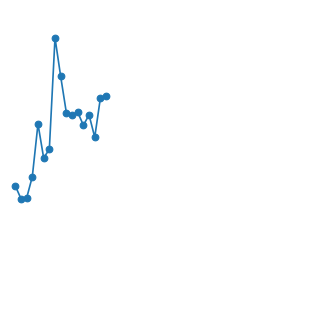

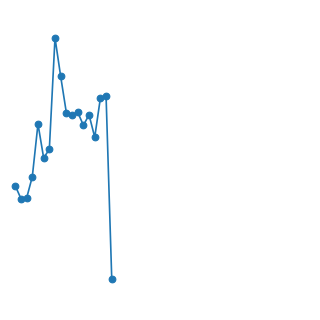

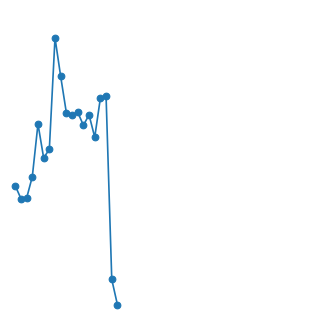

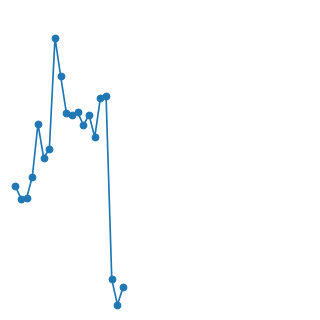

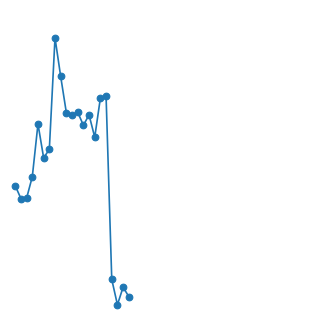

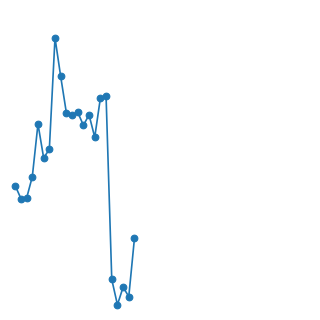

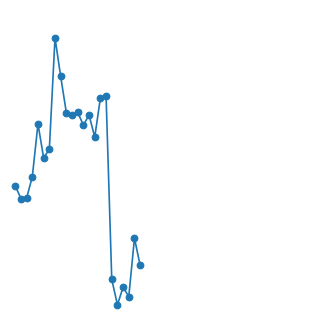

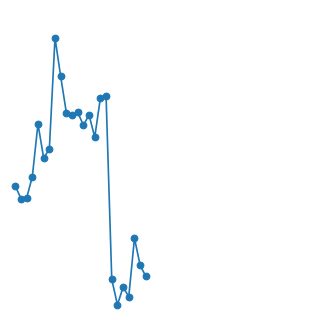

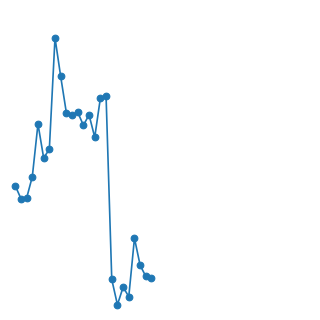

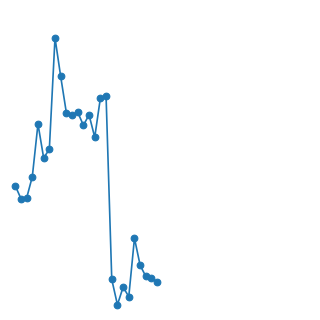

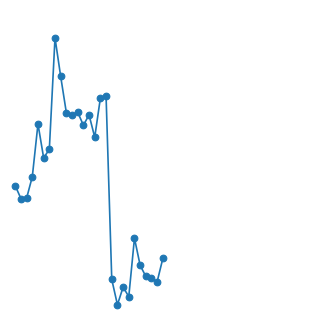

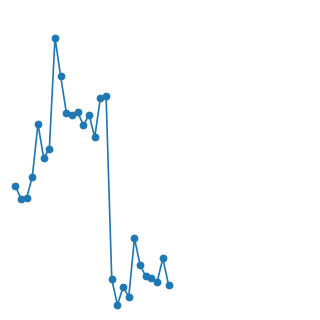

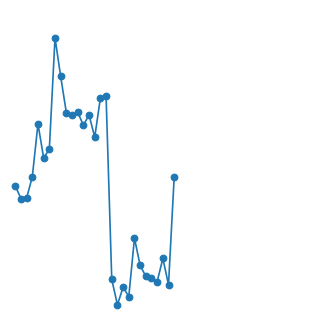

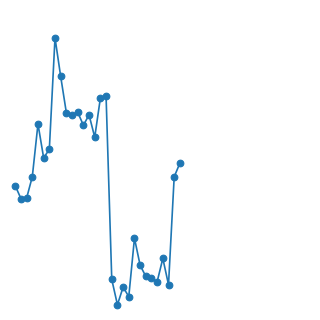

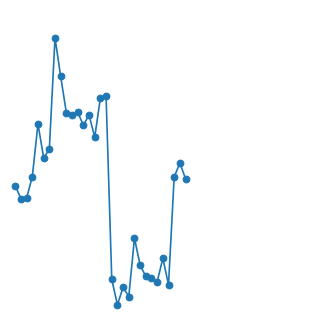

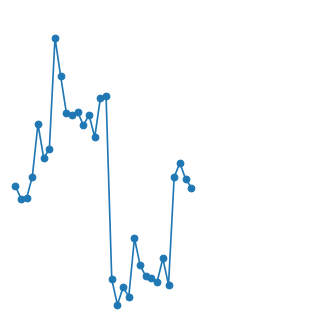

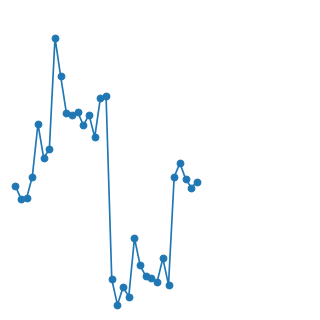

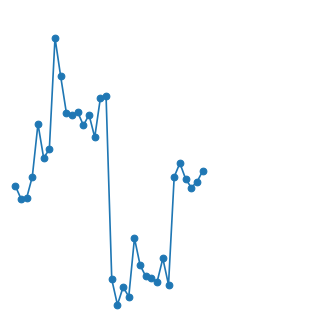

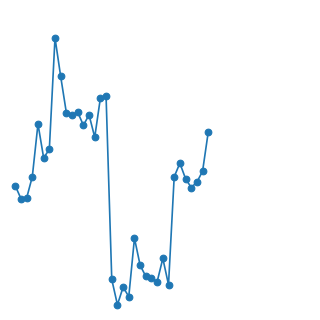

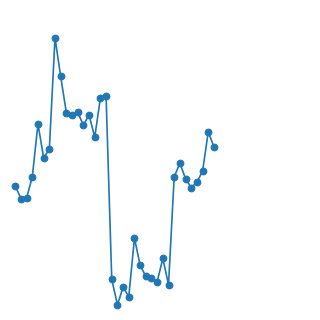

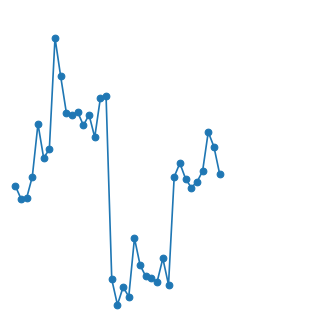

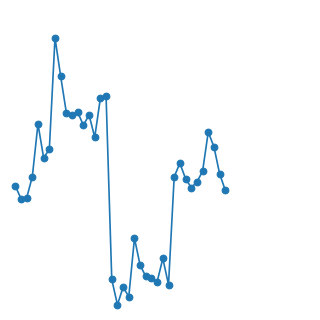

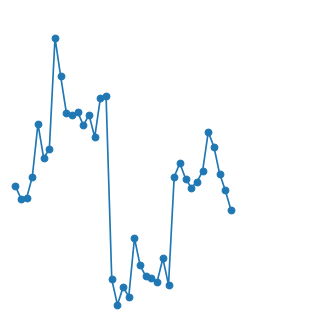

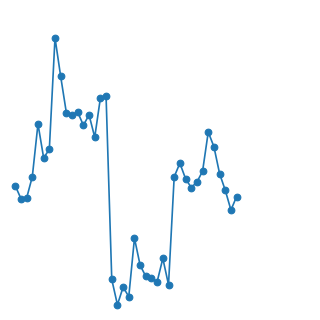

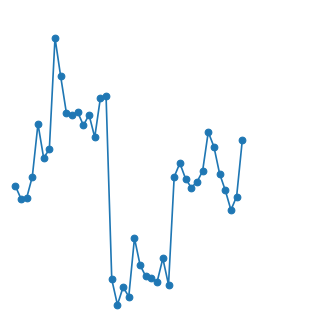

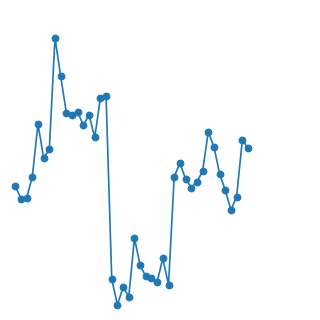

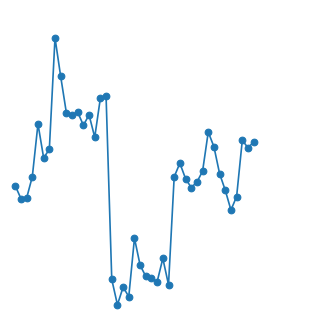

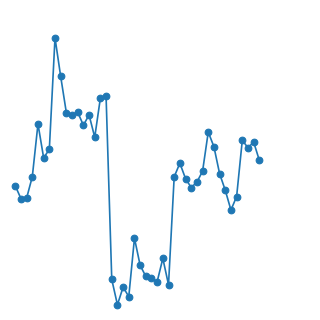

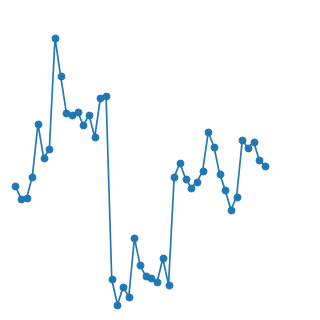

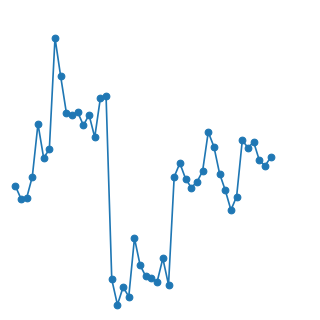

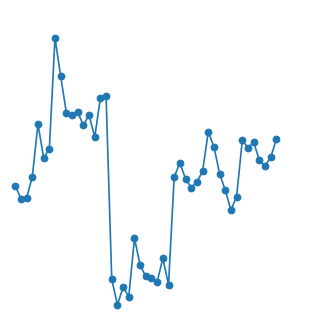

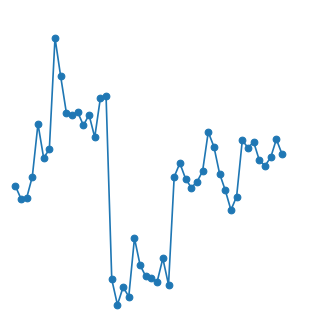

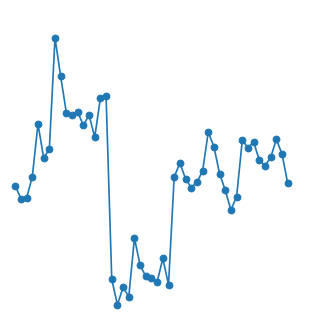

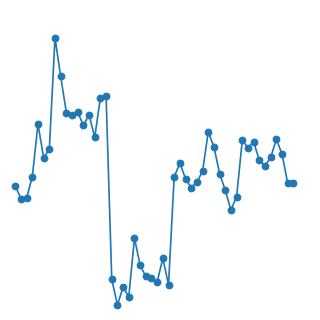

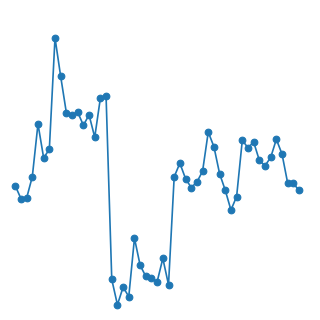

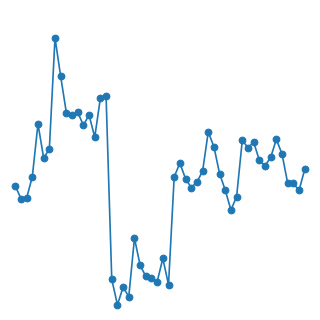

In [44]:
%matplotlib widget
collect = []
for i in range(52):
    collect.append(width[i])
    plt.figure(figsize=(4, 4), dpi=80)
    plt.plot(collect,"-o")
    # # plt.xticks(np.arange(0,len(hr_list),1),labels=hr_list,rotation = 90)
    plt.rcParams.update({'font.size': 8})
    plt.ylim(8.5,10.5)
    plt.xlim(-1,52)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(fname= save_img_path+"/"+file_names[i]+"_width.png")

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 07:49:00


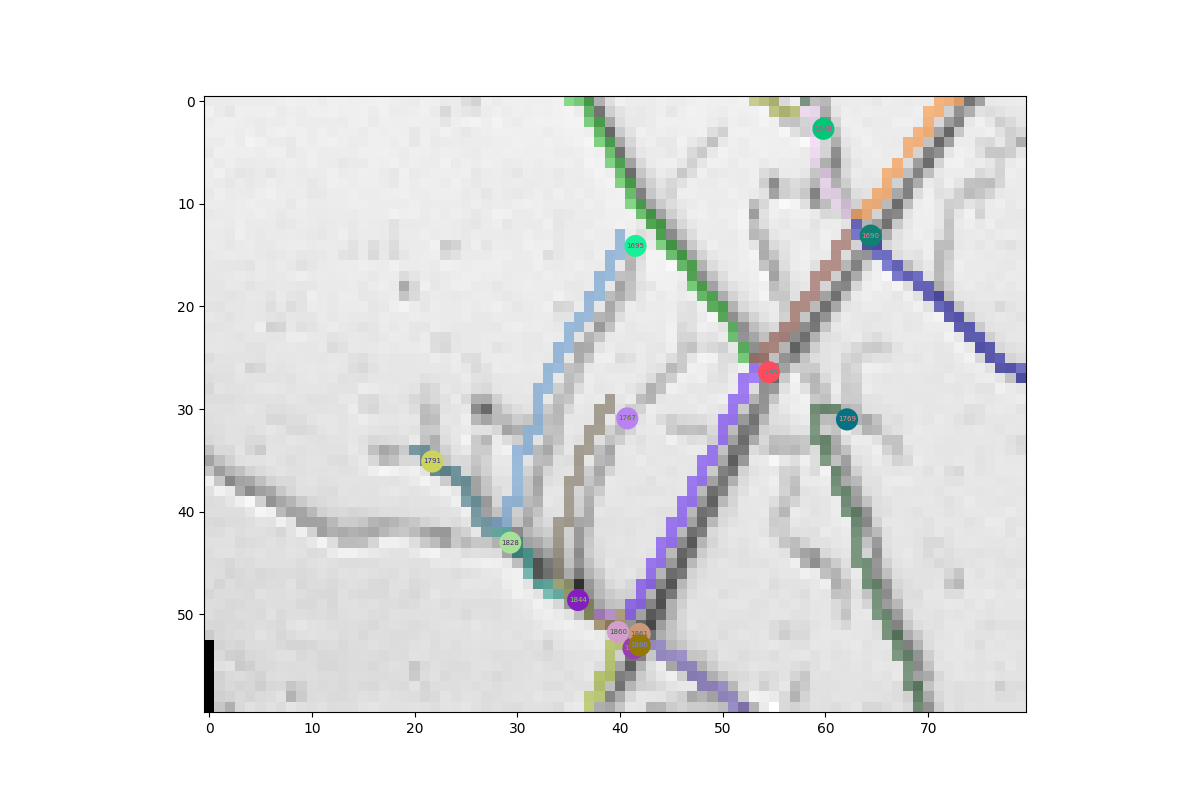

In [21]:
# check the node
%matplotlib widget
exp = Experiment(directory)
select = folder_df[(folder_df["Plate"] == "521") & (folder_df["folder"] == file_names[14])]
exp.load(select, suffix="")
exp.load_tile_information(0)
plot_full(exp,t=0,downsizing=10,region= [[16600, 19600], [17200,20400]],
                              edges=get_all_edges(exp, 0),
                              nodes=get_all_nodes(exp, 0))

In [22]:
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]

In [23]:
G.edges(1745)

EdgeDataView([(1745, 1598), (1745, 1861), (1745, 1690)])

## combine width and region

In [21]:
directory = os.path.join(storage_path,"video","521_20230104")
save_img_path = directory+"/video_img/"
img_files = os.listdir(save_img_path)
img_files = img_files[1:]
img_files.sort()
len(img_files)

52

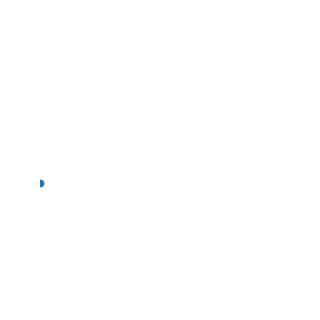

In [42]:
image1 = Image.open(os.path.join(save_img_path,img_files[0]))
image1

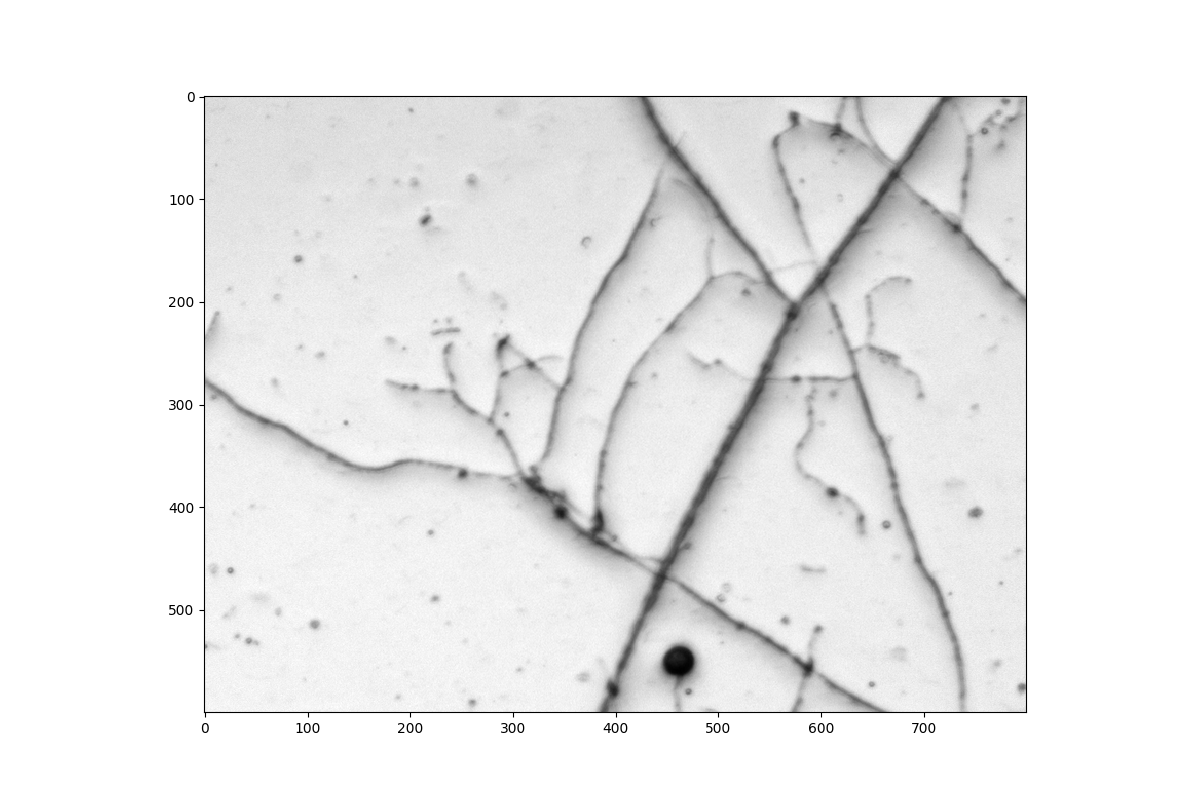

In [23]:
save_video_path = os.path.join(storage_path,'video','521_20230104','video','pos16_closer')
video_files = os.listdir(save_video_path)
video_files.sort()
video_files = video_files[1:-1]
len(video_files)
image2 = Image.open(os.path.join(save_video_path,video_files[0]))
image2

In [81]:
def img_to_video(img_files:list, save_img_path:str,save_file_name:str,choose_type = "normal",width_files=None,save_width_path=None,width_value_list=None):
    img_path = [os.path.join(save_img_path,file) for file in img_files]
    date_list = ["".join(os.path.splitext(path)[0].split("/")[-1].split("_")[:2]) for path in img_path]
    datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
    diff_list = [(date - datetime_list[0]) for date in datetime_list] 
    hr_list = [str(hr.seconds//3600+hr.days*24) + "hour(s)" for hr in diff_list] 
    imgs = [cv2.imread(path) for path in img_path]
    for index,img in enumerate(imgs):
        pos = img.shape[0]//10, img.shape[1]//10
        cv2.putText(img=img, text=hr_list[index], org=pos, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 0, 0),thickness=3)
        if choose_type == "combine":
            width_path = [os.path.join(save_width_path,file) for file in width_files]
            widths = [cv2.imread(path) for path in width_path]
            width = widths[index]
            img[img.shape[0]-width.shape[0]:img.shape[0], img.shape[1]-width.shape[1]:img.shape[1]] = width
            pos2 = img.shape[1]-width.shape[1],img.shape[0]-width.shape[0]
            cv2.putText(img=img, text=str(np.around(width_value_list[index],1))+'um', org= pos2, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(255, 0, 0),thickness=2)
    imageio.mimsave(os.path.join(save_img_path,save_file_name),imgs)
    return imgs

In [83]:
img_to_video(video_files, save_video_path,"pos16_combine.mp4",choose_type = "combine",width_files=img_files,save_width_path=save_img_path,width_value_list=width)

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [80]:
%matplotlib widget
img1 = cv2.imread(os.path.join(save_img_path,img_files[0]))
img2 = cv2.imread(os.path.join(save_video_path,video_files[0]))
pos = img2.shape[0]//10, img2.shape[1]//10
cv2.putText(img=img2, text=hr_list[0], org=pos, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 0, 0),thickness=3)

img2[img2.shape[0]-img1.shape[0]:img2.shape[0], img2.shape[1]-img1.shape[1]:img2.shape[1]] = img1
pos2 = img2.shape[1]-img1.shape[1],img2.shape[0]-img1.shape[0]
cv2.putText(img=img2, text=str(np.around(width[0],1))+'um', org= pos2
            , fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(255, 0, 0),thickness=2)
imageio.imwrite(os.path.join(save_img_path,"test.png"), img2)

# Whole plate

## Check different time point width distribution

In [ ]:
directory = os.path.join(storage_path,"old") + "/"
update_plate_info(directory)
folder_df = get_current_folders(directory)
file_names = folder_df.folder.tolist()
file_names.sort()
select = folder_df[folder_df["folder"] == file_names[2]]

In [ ]:
exp = Experiment(directory)
exp.load(select, suffix="")
exp.load_tile_information(0)

In [ ]:
width_fun = lambda edge: compute_edge_width_profile(
    exp, 0, edge, resolution=4, offset=5, target_length=100)
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=4, step=3)

In [ ]:
def f_w(edge):
    if edge in medians:
        return medians[edge]
    else:
        return 0.0

In [ ]:
edges = get_all_edges(exp, 0)
medians = {}
for edge in edges:
    if len(edge.pixel_list(0)) > 100:
        widths = width_fun(edge)
        medians[edge] = np.median(widths)

In [ ]:
%matplotlib widget
bins = [[0.5, 3.5], [3.5, 4.5], [4.5, 6], [6, 8], [8, 12],[12, 18]]
plot_edge_width(exp, 0, width_fun=f_w, intervals=bins, dilation=20, color_seed=100,save_path = "plot_data/full plate/20230113_0949_Plate02_BO100.png")

In [ ]:
%matplotlib widget
hist = []
for key,value in medians.items():
    if value > 1e5:
        print(value)
    else:
        hist.append(value)
plt.hist(hist)
plt.xlabel("width ($\mu m$)")
plt.ylabel("frequency")
plt.title("BO width distribution 20230113_0949_Plate02_BO100")
plt.savefig("plot_data/width distribution/BO width distribution 20230113_0949_Plate02_BO100.png")

In [ ]:
import os
import sys
sys.path.append("/home/ipausers/lin/Desktop/AMF/AMFtrack")
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
import json
import imageio
import logging
import cv2
from skimage.measure import profile_line
from amftrack.pipeline.functions.image_processing.experiment_class_surf import *
from amftrack.pipeline.functions.image_processing.experiment_util import *
from amftrack.util.sys import *
from amftrack.util.plot import *
from amftrack.util.geometry import *
from amftrack.util.image_analysis import *
from amftrack.pipeline.functions.image_processing.extract_width_fun import *
sys.path.append("/home/ipausers/lin/Desktop/Kai/Graduation-Project")
from models.config import *
from models.video import *


width_fun = lambda edge: compute_edge_width_profile(
    exp, 0, edge, resolution=4, offset=5, target_length=100)
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=4, step=3)
def f_w(edge):
    if edge in medians:
        return medians[edge]
    else:
        return 0.0

if __name__ == "__main__":
    directory_groundtruths = os.path.join(storage_path,"video","521_20230104")
    directory = directory_groundtruths+"/"
    save_img_path = os.path.join(main_path,"notebook","plot_data","full plate")
    update_plate_info(directory)
    folder_df = get_current_folders(directory)
    file_names = folder_df.folder.tolist()
    file_names.sort()
    plate_number = "521"
    bins = [[0.5, 3.5], [3.5, 4.5], [4.5, 6], [6, 8], [8, 12],[12, 18]]
    exp = Experiment(directory)
    for file_name in file_names:
        select = folder_df[(folder_df["Plate"] == plate_number) & (folder_df["folder"] == file_name)]
        exp.load(select, suffix="")
        exp.load_tile_information(0)
        edges = get_all_edges(exp, 0)
        medians = {}
        for edge in edges:
            if len(edge.pixel_list(0)) > 100:
                widths = width_fun(edge)
                medians[edge] = np.median(widths)
        plot_edge_width(exp, 0, width_fun=f_w, intervals=bins, dilation=20, color_seed=100,save_path = save_img_path+"/"+file_name+"_BO100.png")
        plt.clf()
        hist = []
        for key,value in medians.items():
            if value > 1e5:
                print(value)
            else:
                hist.append(value)
        plt.figure(figsize=(8, 8))
        plt.hist(hist)
        plt.xlabel("width ($\mu m$)")
        plt.ylabel("frequency")
        plt.title(f"BO width distribution {file_name}_BO100")
        plt.savefig(os.path.join(main_path,"notebook","plot_data","width distribution",file_name)+"width distribution_BO100.png")
        plt.clf()

## Check along the hyphae

In [ ]:
import os
import sys
sys.path.append("/home/ipausers/lin/Desktop/AMF/AMFtrack")
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
import json
import imageio
import logging
import cv2
from skimage.measure import profile_line
from amftrack.pipeline.functions.image_processing.experiment_class_surf import *
from amftrack.pipeline.functions.image_processing.experiment_util import *
from amftrack.util.sys import *
from amftrack.util.plot import *
from amftrack.util.geometry import *
from amftrack.util.image_analysis import *
from amftrack.pipeline.functions.image_processing.extract_width_fun import *

In [ ]:
directory_groundtruths = os.path.join(storage_path)
directory = directory_groundtruths+"/old/"
update_plate_info(directory)
folder_df = get_current_folders(directory)
select = folder_df[(folder_df["Plate"] == "521")& (folder_df["folder"] =="20230109_1409_Plate02")]

In [ ]:
exp = Experiment(directory)
exp.load(select, suffix="")
exp.load_tile_information(0)

In [ ]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
for path in sorted(nx.shortest_path(G, 403, 1548)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 1775, 2016)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 813, 847)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 847,2016)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 2040,3183)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 3183,4010)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 3688,4010)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 7407,4010)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 7477,5999)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 5004,5999)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 5004,4663)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 4438,3437)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 2507,3437)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 2507,2609)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 2507,582)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 2230,2006)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 1435,1304)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 1435,1286)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 1135,1045)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 920,867)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 1610,1419)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 1255,873)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
)

In [ ]:
from models.model import load_model
latest = load_model(model_path,"BO_without_crop_best_model")
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=4, step=3)

In [ ]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
all_edge = []
for path in sorted(nx.shortest_path(G, 1548, 2027)):
    node_label.append(path)
    nodes.append(Node(path,exp))
    for i in list(G.neighbors(path)):
        nodes.append(Node(i,exp))
        edge = get_edge_from_node_labels(exp, 0, path, i)
        all_edge.append(edge)
RH_edge = []
for index in range(len(node_label[:-1])):
    node1, node2 = node_label[index], node_label[index+1]
    edge = get_edge_from_node_labels(exp, 0, node1, node2)
    RH_edge.append(edge)
BAS_edge = list(set(all_edge).difference(RH_edge))

%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
    edges = BAS_edge
)

In [ ]:
unwant_node = [(1548,1430),(1176,1548)]
unwant_edge = [get_edge_from_node_labels(exp, 0, node1, node2) for node1, node2 in unwant_node]
print(len(BAS_edge) - len(unwant_edge))
for i in unwant_edge:
    for j in range(len(BAS_edge)-1):
        if i == BAS_edge[j]:
            del BAS_edge[j]
    if i == BAS_edge[-1]:
        del BAS_edge[-1]
print(len(BAS_edge))
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1,target_length=120)
RH_value = []
for edge in RH_edge:
    slices, coords1, coords2 = f_profiles(edge)
    RH_value.append(np.median(latest.predict(slices,verbose=0)))
BAS_value = []
for edge in BAS_edge:
    slices, coords1, coords2 = f_profiles(edge)
    BAS_value.append(np.median(latest.predict(slices,verbose=0)))
print(np.std(RH_value), np.mean(RH_value))
print(np.std(BAS_value), np.mean(BAS_value))
print(np.mean(BAS_value)/np.mean(RH_value))

In [ ]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
all_edge = []
for path in sorted(nx.shortest_path(G, 403, 1548)):
    node_label.append(path)
    nodes.append(Node(path,exp))
    for i in list(G.neighbors(path)):
        nodes.append(Node(i,exp))
        edge = get_edge_from_node_labels(exp, 0, path, i)
        all_edge.append(edge)
RH_edge = []
for index in range(len(node_label[:-1])):
    node1, node2 = node_label[index], node_label[index+1]
    edge = get_edge_from_node_labels(exp, 0, node1, node2)
    RH_edge.append(edge)
BAS_edge = list(set(all_edge).difference(RH_edge))

%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
    edges = BAS_edge
)

In [ ]:
unwant_node = [(403,370),(1548,1430),(1548,1594)]
unwant_edge = [get_edge_from_node_labels(exp, 0, node1, node2) for node1, node2 in unwant_node]
print(len(BAS_edge)-len(unwant_edge))
for i in unwant_edge:
    for j in range(len(BAS_edge)-1):
        if i == BAS_edge[j]:
            del BAS_edge[j]
    if i == BAS_edge[-1]:
        del BAS_edge[-1]
print(len(BAS_edge))
RH_value = []
for edge in RH_edge:
    slices, coords1, coords2 = f_profiles(edge)
    RH_value.append(np.median(latest.predict(slices,verbose=0)))
BAS_value = []
for edge in BAS_edge:
    slices, coords1, coords2 = f_profiles(edge)
    BAS_value.append(np.median(latest.predict(slices,verbose=0)))
print(np.std(RH_value), np.mean(RH_value))
print(np.std(BAS_value), np.mean(BAS_value))
print(np.mean(BAS_value)/np.mean(RH_value))

In [ ]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
all_edge = []
for path in sorted(nx.shortest_path(G, 4762, 5999)):
    node_label.append(path)
    nodes.append(Node(path,exp))
    for i in list(G.neighbors(path)):
        nodes.append(Node(i,exp))
        edge = get_edge_from_node_labels(exp, 0, path, i)
        all_edge.append(edge)
RH_edge = []
for index in range(len(node_label[:-1])):
    node1, node2 = node_label[index], node_label[index+1]
    edge = get_edge_from_node_labels(exp, 0, node1, node2)
    RH_edge.append(edge)
BAS_edge = list(set(all_edge).difference(RH_edge))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
    edges = BAS_edge
)

In [ ]:
unwant_node = [(5994,5999),(5999,6066),(4695,4762)]
unwant_edge = [get_edge_from_node_labels(exp, 0, node1, node2) for node1, node2 in unwant_node]
print(len(BAS_edge)-len(unwant_edge))
for i in unwant_edge:
    for j in range(len(BAS_edge)-1):
        if i == BAS_edge[j]:
            del BAS_edge[j]
    if i == BAS_edge[-1]:
        del BAS_edge[-1]
print(len(BAS_edge))
RH_value = []
for edge in RH_edge:
    slices, coords1, coords2 = f_profiles(edge)
    RH_value.append(np.median(latest.predict(slices,verbose=0)))
BAS_value = []
for edge in BAS_edge:
    slices, coords1, coords2 = f_profiles(edge)
    BAS_value.append(np.median(latest.predict(slices,verbose=0)))

print(np.std(RH_value), np.mean(RH_value))
print(np.std(BAS_value), np.mean(BAS_value))
print(np.mean(BAS_value)/np.mean(RH_value))

In [ ]:
for edge in RH_edge:
    slices, coords1, coords2 = f_profiles(edge)
    print(edge)
    print(np.median(latest.predict(slices,verbose=0)))

In [ ]:
%matplotlib widget
plot_edge(RH_edge[1], 0, mode=2)

In [ ]:
del RH_value[1]
print(np.std(RH_value), np.mean(RH_value))
print(np.std(BAS_value), np.mean(BAS_value))
print(np.mean(BAS_value)/np.mean(RH_value))

In [ ]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
all_edge = []
for path in sorted(nx.shortest_path(G, 1148, 873)):
    node_label.append(path)
    nodes.append(Node(path,exp))
    for i in list(G.neighbors(path)):
        nodes.append(Node(i,exp))
        edge = get_edge_from_node_labels(exp, 0, path, i)
        all_edge.append(edge)
RH_edge = []
for index in range(len(node_label[:-1])):
    node1, node2 = node_label[index], node_label[index+1]
    edge = get_edge_from_node_labels(exp, 0, node1, node2)
    RH_edge.append(edge)
BAS_edge = list(set(all_edge).difference(RH_edge))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
    edges = BAS_edge
)

In [ ]:
unwant_node = [(873,793),(1237,1148)]
unwant_edge = [get_edge_from_node_labels(exp, 0, node1, node2) for node1, node2 in unwant_node]
print(len(BAS_edge)-len(unwant_edge))
for i in unwant_edge:
    for j in range(len(BAS_edge)-1):
        if i == BAS_edge[j]:
            del BAS_edge[j]
    if i == BAS_edge[-1]:
        del BAS_edge[-1]
print(len(BAS_edge))
RH_value = []
for edge in RH_edge:
    slices, coords1, coords2 = f_profiles(edge)
    RH_value.append(np.median(latest.predict(slices,verbose=0)))
BAS_value = []
for edge in BAS_edge:
    slices, coords1, coords2 = f_profiles(edge)
    BAS_value.append(np.median(latest.predict(slices,verbose=0)))
print(np.std(RH_value), np.mean(RH_value))
print(np.std(BAS_value), np.mean(BAS_value))
print(np.mean(BAS_value)/np.mean(RH_value))

In [ ]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
all_edge = []
for path in sorted(nx.shortest_path(G, 1135, 676)):
    node_label.append(path)
    nodes.append(Node(path,exp))
    for i in list(G.neighbors(path)):
        nodes.append(Node(i,exp))
        edge = get_edge_from_node_labels(exp, 0, path, i)
        all_edge.append(edge)
RH_edge = []
for index in range(len(node_label[:-1])):
    node1, node2 = node_label[index], node_label[index+1]
    edge = get_edge_from_node_labels(exp, 0, node1, node2)
    RH_edge.append(edge)
BAS_edge = list(set(all_edge).difference(RH_edge))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
    edges = BAS_edge
)

In [ ]:
unwant_node = [(1135,1255),(631,676)]
unwant_edge = [get_edge_from_node_labels(exp, 0, node1, node2) for node1, node2 in unwant_node]
print(len(BAS_edge)-len(unwant_edge))
for i in unwant_edge:
    for j in range(len(BAS_edge)-1):
        if i == BAS_edge[j]:
            del BAS_edge[j]
    if i == BAS_edge[-1]:
        del BAS_edge[-1]
print(len(BAS_edge))
RH_value = []
for edge in RH_edge:
    slices, coords1, coords2 = f_profiles(edge)
    RH_value.append(np.median(latest.predict(slices,verbose=0)))
BAS_value = []
for edge in BAS_edge:
    slices, coords1, coords2 = f_profiles(edge)
    BAS_value.append(np.median(latest.predict(slices,verbose=0)))
print(np.std(RH_value), np.mean(RH_value))
print(np.std(BAS_value), np.mean(BAS_value))
print(np.mean(BAS_value)/np.mean(RH_value))

In [ ]:
directory_groundtruths = os.path.join(storage_path)
directory = directory_groundtruths+"/"
update_plate_info(directory)
folder_df = get_current_folders(directory)
select = folder_df[(folder_df["Plate"] == "493")]
exp = Experiment(directory)
exp.load(select, suffix="")
exp.load_tile_information(0)

In [ ]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
for path in sorted(nx.shortest_path(G, 37, 73)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 56, 61)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 76, 450)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 531, 450)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 531, 727)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 730, 225)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 37, 25)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
for path in sorted(nx.shortest_path(G, 37, 36)): 
    node_label.append(path)
    nodes.append(Node(path,exp))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
)

In [ ]:
import networkx as nx
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]
nodes = []
node_label=[]
all_edge = []
for path in sorted(nx.shortest_path(G, 25, 52)):
    node_label.append(path)
    nodes.append(Node(path,exp))
    for i in list(G.neighbors(path)):
        nodes.append(Node(i,exp))
        edge = get_edge_from_node_labels(exp, 0, path, i)
        all_edge.append(edge)
RH_edge = []
for index in range(len(node_label[:-1])):
    node1, node2 = node_label[index], node_label[index+1]
    edge = get_edge_from_node_labels(exp, 0, node1, node2)
    RH_edge.append(edge)
BAS_edge = list(set(all_edge).difference(RH_edge))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=10,
    nodes = nodes,
    edges = BAS_edge
)

In [ ]:
unwant_node = [(20,25),(52,55)]
unwant_edge = [get_edge_from_node_labels(exp, 0, node1, node2) for node1, node2 in unwant_node]
print(len(BAS_edge)-len(unwant_edge))
for i in unwant_edge:
    for j in range(len(BAS_edge)-1):
        if i == BAS_edge[j]:
            del BAS_edge[j]
    if i == BAS_edge[-1]:
        del BAS_edge[-1]
print(len(BAS_edge))
RH_value = []
for edge in RH_edge:
    slices, coords1, coords2 = f_profiles(edge)
    RH_value.append(np.median(latest.predict(slices,verbose=0)))
BAS_value = []
for edge in BAS_edge:
    slices, coords1, coords2 = f_profiles(edge)
    BAS_value.append(np.median(latest.predict(slices,verbose=0)))
print(np.std(RH_value), np.mean(RH_value))
print(np.std(BAS_value), np.mean(BAS_value))
print(np.mean(BAS_value)/np.mean(RH_value))

In [ ]:
BAS_value, RH_value

# Useful code

In [46]:
def get_slices_from_node(index,return_dict):
    """
    # For multiprocessing
    from multiprocessing import Process,Manager
    manager = Manager()
    return_dict = manager.dict()
    for i in range(52):
        p = Process(target=get_slices_from_node, args=(i,return_dict))
        p.start()
        collect.append(p)
    for process in collect:
        process.join()
    """
    select = folder_df[(folder_df["Plate"] == "521") & (folder_df["folder"] == file_names[index])]
    exp.load(select, suffix="")
    exp.load_tile_information(0)
    node1, node2 = node_list[index]
    slices, coords1, coords2 = f_profiles(get_edge_from_node_labels(exp, 0, node1,node2))
    print(str(index)+" is processing")
    return_dict[index] = slices

def get_width_from_slices(index,width_dict):
    """
    # For multiprocessing
    from multiprocessing import Process,Manager
    manager = Manager()
    width_dict = manager.dict()
    for i in range(52):
        p = Process(target=get_width_from_slices, args=(i,width_dict))
        p.start()
        collect.append(p)
    for process in collect:
        process.join()
    """
    predict_value = latest.predict(return_dict[index],verbose=0)
    width_dict[index] = np.median(predict_value)

manager = Manager()
return_dict = manager.dict()
for i in range(52):
    p = Process(target=get_slices_from_node, args=(i,return_dict))
    p.start()
    collect.append(p)
for process in collect:
    process.join()
    
def img_to_video(img_files:list, save_img_path:str,save_file_name:str,choose_type = "normal",width_files=None,save_width_path=None,width_value_list=None):
    """
    img_files: list from os.listdir only file name
    save_img_path: str the main path to the folder you want to create movie.
    save_file_name: the name of the video. mp4
    choose_type: to handle the combine or normal type of video
    
    width_files:list from os.listdir only file name
    save_width_path: str the main path to the folder you save width img
    width_value_list: list for the correct width value
    """
    img_path = [os.path.join(save_img_path,file) for file in img_files]
    date_list = ["".join(os.path.splitext(path)[0].split("/")[-1].split("_")[:2]) for path in img_path]
    datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
    diff_list = [(date - datetime_list[0]) for date in datetime_list] 
    hr_list = [str(hr.seconds//3600+hr.days*24) + "hour(s)" for hr in diff_list] 
    imgs = [cv2.imread(path) for path in img_path]
    for index,img in enumerate(imgs):
        pos = img.shape[0]//10, img.shape[1]//10
        cv2.putText(img=img, text=hr_list[index], org=pos, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 0, 0),thickness=3)
        if choose_type == "combine":
            width_path = [os.path.join(save_width_path,file) for file in width_files]
            widths = [cv2.imread(path) for path in width_path]
            width = widths[index]
            img[img.shape[0]-width.shape[0]:img.shape[0], img.shape[1]-width.shape[1]:img.shape[1]] = width
            pos2 = img.shape[1]-width.shape[1],img.shape[0]-width.shape[0]
            cv2.putText(img=img, text=str(np.around(width_value_list[index],1))+'um', org= pos2, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(255, 0, 0),thickness=2)
    imageio.mimsave(os.path.join(save_img_path,save_file_name),imgs)
    return imgs

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 01:49:00
2023-01-09 03:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 05:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 07:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-09 09:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 11:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 17:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 14:09:00
2023-01-09 19:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-09 21:49:00
2023-01-09 23:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 03:49:002023-01-10 01:49:00



/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 05:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 07:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-10 09:49:00
2023-01-10 11:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-10 14:20:002023-01-10 15:46:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-10 17:46:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su


2023-01-10 19:46:002023-01-10 21:46:002023-01-10 23:46:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(





2023-01-11 01:46:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su


2023-01-11 03:46:002023-01-11 05:46:00

2023-01-11 07:46:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-11 09:46:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su

2023-01-11 15:49:002023-01-11 11:49:002023-01-11 13:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(




2023-01-11 18:06:00



/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-11 19:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-11 21:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-11 23:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-12 01:49:002023-01-12 03:49:00



/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-12 05:49:002023-01-12 07:49:00



/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-12 09:49:00
2023-01-12 11:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-12 13:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-12 15:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-12 17:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-12 19:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-12 21:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-12 23:49:00
2023-01-13 01:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-13 03:49:00

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(



2023-01-13 05:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-13 07:49:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-13 09:49:00


AttributeError: 'numpy.float32' object has no attribute 'join'

Process Process-113:
Process Process-115:
Process Process-109:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_175472/935823129.py", line 6, in get_slices_from_node
    slices, coords1, coords2 = f_profiles(get_edge_from_node_labels(exp, 0, node1,node2))
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/tmp/ipykernel_175472/3634956882.py", line 3, in <lambda>
    f_profiles = lambda edge: extract_section_profiles_for_edge(exp, 0, edge

0 is processing

  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()


  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_175472/935823129.py", line 3, in get_slices_from_node
    exp.load(select, suffix="")
  File "/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py", line 116, in load
    (g, pos) = pickle.load(open(path_save, "rb"))
  File "/home/ipausers/lin/Desktop/Kai/Graduation-Project/graduation/lib/python3.8/site-packages/networkx/classes/reportviews.py", line 175, in __setstate__
    def __setstate__(self, state):
KeyboardInterrupt
Process Process-121:
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_175472/935823129.py", line 3, in get_slices_from_node
    exp.load(select, suffix